In [3]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import random

# Load Breast Cancer Data
data = load_breast_cancer()

In [4]:
# Print out names of the features (X) and name of the target(Y)

x = data.feature_names
y = data.target_names

print("Feature Names:", x)

print()

print("Target Names:", y)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']


In [5]:
# Allocate half the data to Train and half to Test
X_train = []
Y_train = []

X_test = []
Y_test = []

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.5)

In [6]:
# Write a program that generates a decision tree from X train, y train
# and predict y pred from X test. You can compute accuracy of the classifier by
# comparing y pred and y test. Please print out the accuracy.

decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=2)
decision_tree = decision_tree.fit(X_train, Y_train)

y_pred = decision_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_pred, Y_test))

Accuracy: 0.9263157894736842


<module 'sklearn.tree' from 'c:\\Users\\tommy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\sklearn\\tree\\__init__.py'>

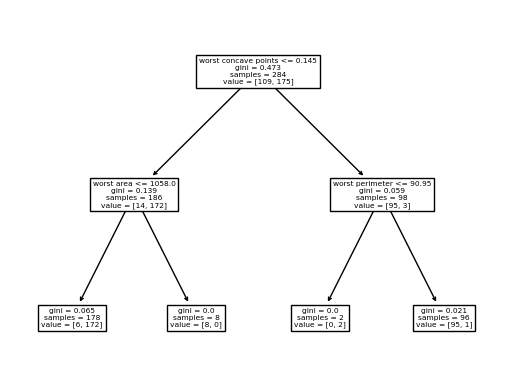

In [7]:
# Visualize Tree and have each node include feature name
tree.plot_tree(decision_tree, feature_names=x)
tree

In [8]:
# Similarly, write a program that generates multiple decision trees using
# the bagging. This method should record its prediction accuracy at bagging score
# by varying the parameter n estimators. Draw a 2D line plot whose X-axis is
# n estimators and Y-axis bagging score, and the plot should have more than 20
# data points of different X-axis values
bagScoreList = []
nEstimateList = [i for i in range(1, 40)]

for i in range(nEstimateList):
    bagging_tree = BaggingClassifier(n_estimators = i)
    bagging_tree = bagging_tree.fit(X_train, Y_train)
    
    bagging_score = bagging_tree.score(X_test, Y_test)

    bagScoreList.append(bagging_score)

plt.figure(figsize=(8, 8))
plt.title("Bagging Graph")

plt.plot(nEstimateList, bagScoreList)

plt.xlabel("N-Estimators")
plt.ylabel("Bagging Score")

plt.show()

TypeError: 'list' object cannot be interpreted as an integer

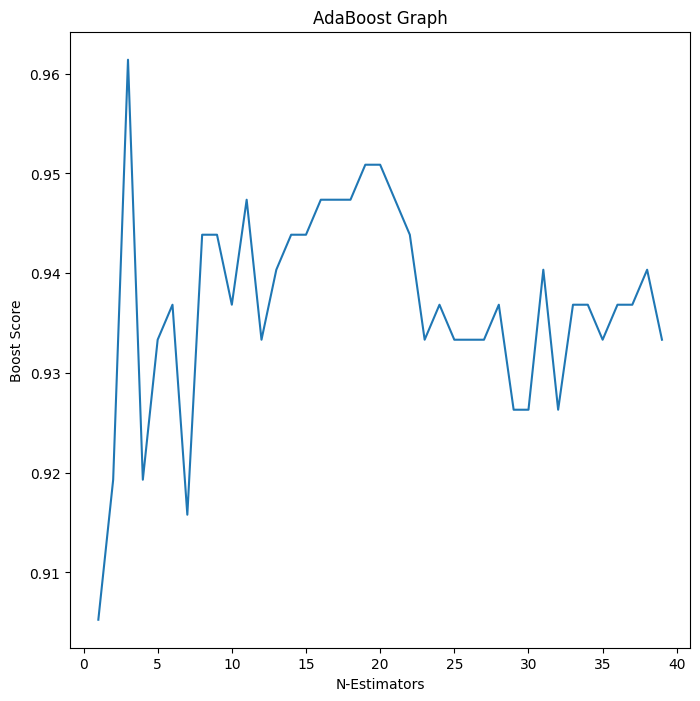

In [ ]:
# Similarly, write a program that generates multiple decision trees using
# the AdaBoost. Draw a 2D line plot whose X-axis is n estimators and Y-axis
# boost score, and the plot should have more than 20 data points of different X-axis
# values.

boostScoreList = []
nEstimateList = [i for i in range(1, 40)]
for i in range(nEstimateList):
    ada_tree = AdaBoostClassifier(n_estimators = i)
    ada_tree = ada_tree.fit(X_train, Y_train)

    boost_score = ada_tree.score(X_test, Y_test)

    boostScoreList.append(boost_score)
    
plt.figure(figsize=(8, 8))

plt.title("AdaBoost Graph")

plt.plot(nEstimateList, boostScoreList)

plt.xlabel("N-Estimators")
plt.ylabel("Boost Score")

plt.show()

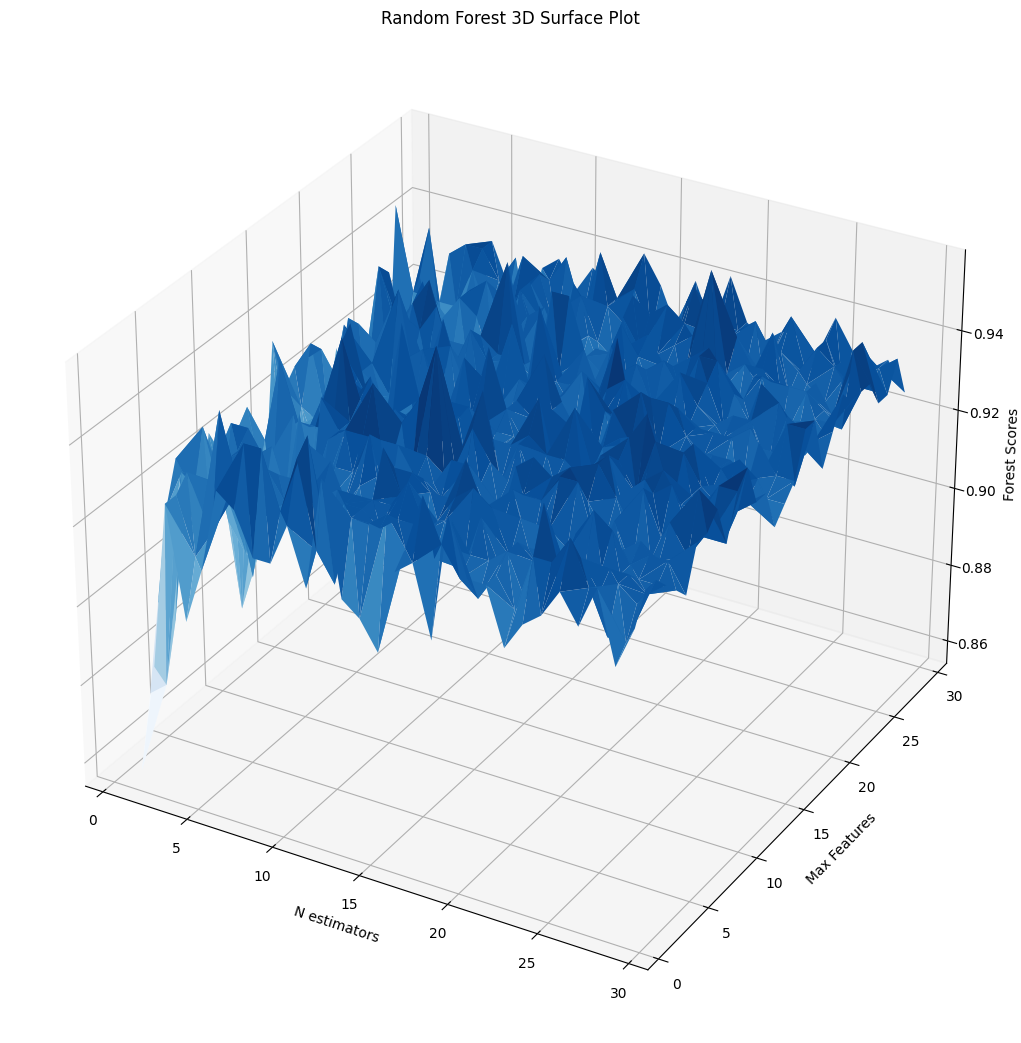

In [9]:
# Similarly, write a program that generates multiple decision trees using
# the random forest. Draw a 3D surface plot whose X-axis is n estimators, Y-axis
# max features, and Z-axis forest score. The plot should have more than 100 data
# points of different pair of X-axis and Y-axis values.

maxFeaturesList = []
forestScoresList = []
nEstimateList = []

for i in range(1, 30):
    for j in range(1, 30):
        random_forest = RandomForestClassifier(n_estimators = i, max_features = j)
        random_forest = random_forest.fit(X_train, Y_train)

        forest_score = random_forest.score(X_test, Y_test)

        forestScoresList.append(forest_score)
        maxFeaturesList.append(j)
        nEstimateList.append(i)

plt.figure(figsize=(13, 13))

ax = plt.axes(projection='3d')
ax.set_title("Random Forest 3D Surface Plot")

ax.plot_trisurf(nEstimateList, maxFeaturesList, forestScoresList, cmap='Blues')

ax.set_xlabel("N estimators")
ax.set_ylabel("Max Features")
ax.set_zlabel("Forest Scores")

plt.show()